##Mini-Project:
###Correlations of various school characteristics using a Bronx study on public schools 

Short stats analysis and CatBoost prediction on data from a study on New York public schools. 
Dataset download: https://data.cityofnewyork.us/api/views/5x8i-3c5b/rows.csv?accessType=DOWNLOAD

In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sb

In [2]:
df = pd.read_csv("~/Downloads/2019_Public_Data_File_-_Students.csv")
df.head(10)

,DBN,School Name,Total Parent \nResponse Rate %,Total Teacher Response Rate %,Total Student Response Rate %,Collaborative Teachers Score,Effective School Leadership Score,Rigorous Instruction Score,Supportive Environment Score,Strong Family-Community Ties Score,Trust Score
0,01M015,P.S. 015 ROBERTO CLEMENTE,91,100,NaN,4.10,4.19,4.02,NaN,4.18,3.96
1,01M019,P.S. 019 ASHER LEVY,100,93,NaN,4.53,4.51,4.80,NaN,4.66,3.76
2,01M020,P.S. 020 ANNA SILVER,58,90,NaN,2.71,2.98,1.92,NaN,3.84,3.14
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,29,100,95.0,2.69,2.59,2.14,NaN,3.67,2.38
4,01M063,THE STAR ACADEMY - P.S.63,80,100,NaN,NaN,NaN,NaN,NaN,NaN,3.77
5,01M064,P.S. 064 ROBERT SIMON,52,96,NaN,4.56,4.09,3.74,NaN,4.18,4.04
6,01M110,P.S. 110 FLORENCE NIGHTINGALE,79,77,NaN,3.11,3.15,1.96,NaN,3.67,3.29
7,01M134,P.S. 134 HENRIETTA SZOLD,46,93,NaN,2.51,1.53,3.19,NaN,3.38,2.55
8,01M140,P.S. 140 NATHAN STRAUS,57,89,87.0,3.44,4.21,3.40,NaN,3.59,3.70
9,01M142,P.S. 142 AMALIA CASTRO,100,100,NaN,3.55,3.73,3.23,NaN,4.01,3.12


This study surveyed parents, teachers, and students to score a large subset of public schools in New York City. 

In [3]:
x1 = df['Collaborative Teachers Score']
y1 = df['Trust Score']
x2 = df['Strong Family-Community Ties Score']
x3 = df['Effective School Leadership Score']

In [4]:
x1

0       4.10
1       4.53
2       2.71
3       2.69
4        NaN
        ... 
1824    3.50
1825    3.01
1826    4.25
1827    4.10
1828    2.37
Name: Collaborative Teachers Score, Length: 1829, dtype: float64

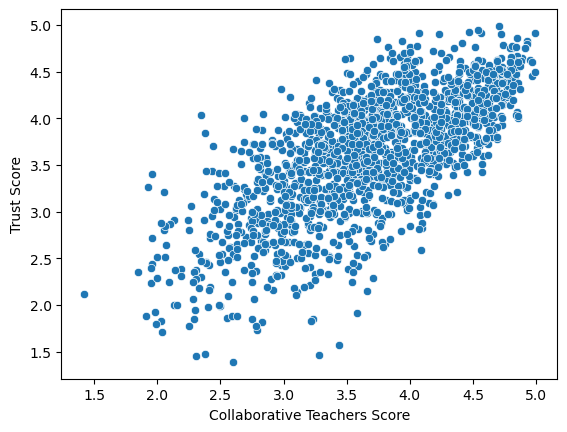

In [5]:
plt1 = sb.scatterplot(x = x1, y = y1)

<Axes: xlabel='Strong Family-Community Ties Score', ylabel='Trust Score'>

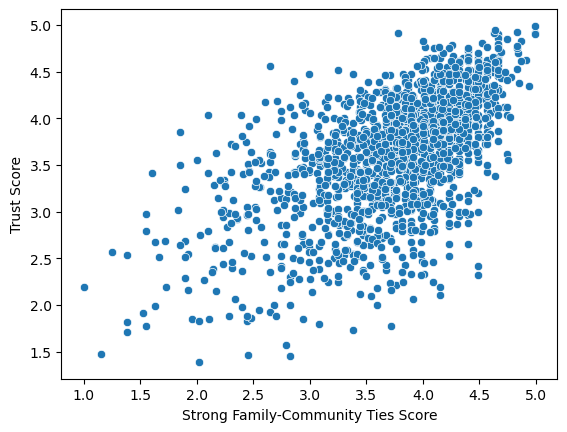

In [6]:
sb.scatterplot(x = x2, y = y1)

<Axes: xlabel='Effective School Leadership Score', ylabel='Trust Score'>

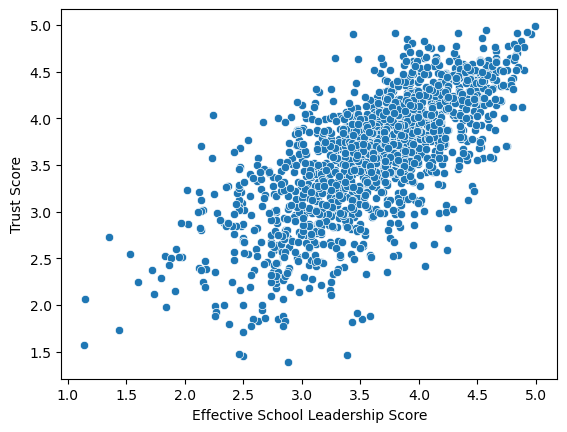

In [7]:
sb.scatterplot(x = x3, y = y1)

We see weak-moderate positive relationships. 

<Axes: xlabel='Collaborative Teachers Score', ylabel='Strong Family-Community Ties Score'>

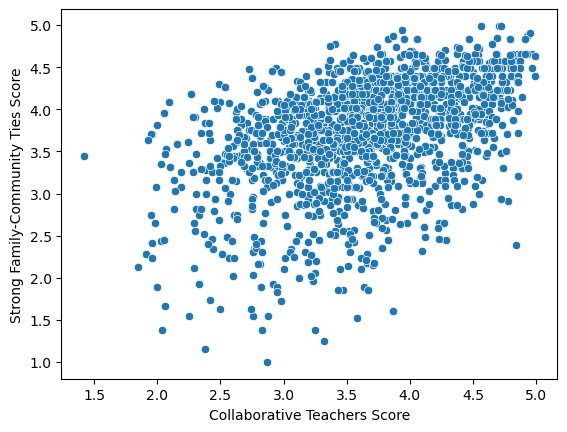

In [8]:
sb.scatterplot(x = x1, y = x2)

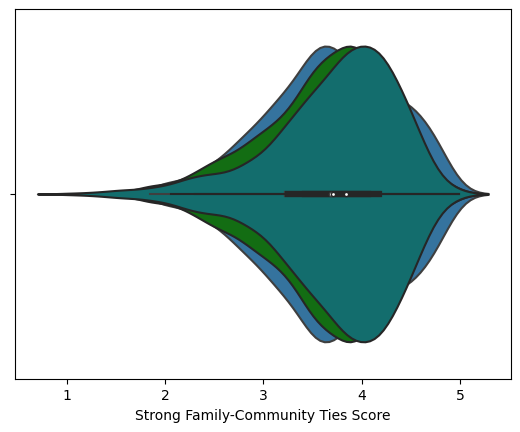

In [43]:
violin1 = sb.violinplot(data = df, x = 'Collaborative Teachers Score', saturation = 0.7, legend = "full")
violin2 = sb.violinplot(data = df, x = 'Trust Score', color = 'green', saturation= 0.7, legend = 'full')
violin3 = sb.violinplot(data = df, x = 'Strong Family-Community Ties Score', color = 'teal', saturation = 0.7, legend = 'full') 

Most frequently occuring scores for Trust and Strong-Family Community Ties are higher than Collaborative Teachers (blue) in this dataset. 

In [5]:
#Calculate Correlation Coefficient

x1_array = np.array(x1) 
y1_array = np.array(y1) 


new_df = pd.DataFrame({
    "x1_array": x1_array, 
    "y1_array": y1_array 
})
adjusted_df = new_df.dropna() #drop nans 

x1_adjusted = adjusted_df["x1_array"]
y1_adjusted = adjusted_df["y1_array"]

r = np.corrcoef([x1_adjusted,y1_adjusted])
print(r[0,1])


0.693589107755614


In [6]:
adjusted_df = pd.DataFrame({"x": x1_adjusted, "y": y1_adjusted })
adjusted_df

,x,y
0,4.10,3.96
1,4.53,3.76
2,2.71,3.14
3,2.69,2.38
5,4.56,4.04
...,...,...
1824,3.50,2.76
1825,3.01,3.17
1826,4.25,3.96
1827,4.10,4.23


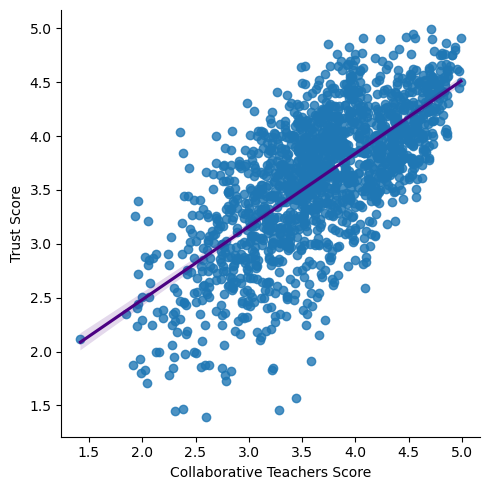

In [ ]:
lobf = sb.lmplot(x = "Collaborative Teachers Score", y = "Trust Score", data = df, line_kws={'color': 'indigo'})

In [ ]:
#equation of line of best fit 
from scipy import stats 
slope, intercept, r_value, p_value, std_err = stats.linregress(adjusted_df['x'], adjusted_df['y'])

print(slope)
print(p_value)
print(std_err)

print(r_value)
r_squared = r_value ** 2 
print(r_squared) #coef of determination 


0.6786196442400991
4.928836240286069e-231
0.017587637998569723
0.6935891077556141
0.4810658503972289


- Low p_value - reject null hypothesis that coefficient is insignificant. 

###Prediction 
Predict trust score given collaborative teachers score, effective leadership score, and rigorous instruction score. 

In [98]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split 

mini_model = CatBoostRegressor() 

In [92]:
df_clean = df.drop(columns = ['Supportive Environment Score'])
df_clean = df_clean.dropna() 
df_clean.head(5)

,DBN,School Name,Total Parent \nResponse Rate %,Total Teacher Response Rate %,Total Student Response Rate %,Collaborative Teachers Score,Effective School Leadership Score,Rigorous Instruction Score,Strong Family-Community Ties Score,Trust Score
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,29,100,95.0,2.69,2.59,2.14,3.67,2.38
8,01M140,P.S. 140 NATHAN STRAUS,57,89,87.0,3.44,4.21,3.40,3.59,3.70
10,01M184,P.S. 184M SHUANG WEN,92,100,100.0,2.68,2.49,2.77,3.42,3.09
11,01M188,P.S. 188 THE ISLAND SCHOOL,99,69,66.0,4.18,4.66,3.85,4.40,4.72
12,01M292,ORCHARD COLLEGIATE ACADEMY,49,100,82.0,3.75,3.48,3.30,3.06,3.88


In [99]:
y_total = df_clean['Trust Score']
x_total = df_clean.drop(columns = ['School Name','Trust Score', 'DBN'])
x_total.head(5)

,Total Parent \nResponse Rate %,Total Teacher Response Rate %,Total Student Response Rate %,Collaborative Teachers Score,Effective School Leadership Score,Rigorous Instruction Score,Strong Family-Community Ties Score
3,29,100,95.0,2.69,2.59,2.14,3.67
8,57,89,87.0,3.44,4.21,3.40,3.59
10,92,100,100.0,2.68,2.49,2.77,3.42
11,99,69,66.0,4.18,4.66,3.85,4.40
12,49,100,82.0,3.75,3.48,3.30,3.06


In [100]:
x_train, x_eval, y_train, y_eval = train_test_split(x_total, y_total, train_size = 0.8)  

In [101]:
mini_model.fit(x_train, y_train, early_stopping_rounds=5)
y_preds = mini_model.predict(x_eval)

Learning rate set to 0.039311
0:	learn: 0.6230898	total: 25.9ms	remaining: 25.8s
1:	learn: 0.6124453	total: 26.9ms	remaining: 13.4s
2:	learn: 0.6011558	total: 27.6ms	remaining: 9.19s
3:	learn: 0.5899210	total: 28.2ms	remaining: 7.03s
4:	learn: 0.5806378	total: 29.2ms	remaining: 5.8s
5:	learn: 0.5710901	total: 29.9ms	remaining: 4.96s
6:	learn: 0.5622400	total: 30.5ms	remaining: 4.33s
7:	learn: 0.5532751	total: 32.3ms	remaining: 4.01s
8:	learn: 0.5446749	total: 36.7ms	remaining: 4.04s
9:	learn: 0.5359813	total: 37.9ms	remaining: 3.75s
10:	learn: 0.5283644	total: 38.6ms	remaining: 3.47s
11:	learn: 0.5211377	total: 39.1ms	remaining: 3.22s
12:	learn: 0.5138854	total: 39.6ms	remaining: 3s
13:	learn: 0.5072257	total: 40ms	remaining: 2.82s
14:	learn: 0.5005574	total: 40.5ms	remaining: 2.66s
15:	learn: 0.4951424	total: 41ms	remaining: 2.52s
16:	learn: 0.4893999	total: 41.5ms	remaining: 2.4s
17:	learn: 0.4835127	total: 42.1ms	remaining: 2.29s
18:	learn: 0.4783703	total: 42.7ms	remaining: 2.2s
19

In [102]:
print(y_preds[0:15])

[2.63006397 3.41915636 4.01491339 3.70917454 3.81439427 3.68823162
 3.70261574 3.08389817 2.58321153 2.09754944 3.75742561 4.0206341
 3.20510483 3.63127467 3.53347443]


In [103]:
#rmse 
from sklearn.metrics import mean_squared_error 
from math import sqrt 

rmse = sqrt(mean_squared_error(y_eval, y_preds))
print(rmse) 

0.38067920502192615
